In [63]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import tensorflow as tf
np.random.seed(1)
tf.random.set_seed(1)

In [64]:
weather_data = pd.read_csv(r"C:\Users\bharg\OneDrive\Desktop\PS - 1\imd_bharati_hourly1.csv")
weather_data['date'] = pd.to_datetime(weather_data['date'], format='%Y-%m-%d %H:%M:%S')
weather_data['month'] = weather_data['date'].dt.month
weather_data['hour'] = weather_data['date'].dt.hour
weather_data['year'] = weather_data['date'].dt.year
weather_data.loc[weather_data['temp']<-70, 'temp'] = -70
weather_data = weather_data.fillna(0)
weather_data

,date,temp,ap,ws,wd,month,hour,year
0,2015-02-06 00:00:00,-1.59,962.75,9.20,119.28,2,0,2015
1,2015-02-06 01:00:00,-1.26,962.64,8.85,123.86,2,1,2015
2,2015-02-06 02:00:00,-0.57,962.71,7.19,122.56,2,2,2015
3,2015-02-06 03:00:00,0.00,962.94,6.91,122.74,2,3,2015
4,2015-02-06 04:00:00,0.56,963.31,7.48,110.36,2,4,2015
...,...,...,...,...,...,...,...,...
63643,2022-05-11 19:00:00,-15.27,985.70,7.28,80.32,5,19,2022
63644,2022-05-11 20:00:00,-14.62,985.81,11.81,78.17,5,20,2022
63645,2022-05-11 21:00:00,-14.40,985.93,12.17,77.43,5,21,2022
63646,2022-05-11 22:00:00,-14.17,986.10,10.96,77.03,5,22,2022


In [65]:
window_size = (7*24*2)
X, y = [], []
for i in range(len(weather_data) - window_size - (3*24)):
    X.append(weather_data['temp'][i:i+window_size])
    y.append(weather_data['temp'][i+window_size])
X = np.array(X)
y = np.array(y)

train = int(len(X)*0.8)
X_train = X[:train]
y_train = y[:train]
X_test = X[train:]
y_test = y[train:]

In [67]:
model = Sequential()
model.add(Dense(64, activation='softplus', input_shape=(window_size,)))
model.add(Dense(64, activation='softplus'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=200, batch_size=100, verbose=1)
loss = model.evaluate(X_test, y_test)
print('Mean Squared:', loss)

Epoch 1/200
506/506 [==============================] - 2s 3ms/step - loss: 4.8531
Epoch 2/200
506/506 [==============================] - 1s 3ms/step - loss: 1.9472
Epoch 3/200
506/506 [==============================] - 1s 3ms/step - loss: 1.5328
Epoch 4/200
506/506 [==============================] - 1s 3ms/step - loss: 1.4205
Epoch 5/200
506/506 [==============================] - 1s 3ms/step - loss: 1.3405
Epoch 6/200
506/506 [==============================] - 1s 3ms/step - loss: 1.2511
Epoch 7/200
506/506 [==============================] - 1s 3ms/step - loss: 1.2058
Epoch 8/200
506/506 [==============================] - 1s 3ms/step - loss: 1.1753
Epoch 9/200
506/506 [==============================] - 1s 3ms/step - loss: 1.1199
Epoch 10/200
506/506 [==============================] - 1s 3ms/step - loss: 1.1032
Epoch 11/200
506/506 [==============================] - 1s 3ms/step - loss: 1.0865
Epoch 12/200
506/506 [==============================] - 1s 3ms/step - loss: 1.1061
Epoch 13/200


In [68]:
predict = []
for i in range(62500, len(weather_data) - window_size):
    asdf = weather_data['temp'][i: i + window_size]
    asdf = np.array([asdf])
    aaa = model.predict(asdf)
    pre_temp = aaa[0][0]
    predict.append(pre_temp)
x = 0
weather_data['predict'] = 0
for i in range(62500+window_size,63648):
    weather_data['predict'][i] = predict[x]
    x = x+1
weather_data

1/1 [==============================] - 0s 26ms/step


C:\Users\bharg\AppData\Local\Temp\ipykernel_15380\322255350.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data['predict'][i] = predict[x]


,date,temp,ap,ws,wd,month,hour,year,predict
0,2015-02-06 00:00:00,-1.59,962.75,9.20,119.28,2,0,2015,0.000000
1,2015-02-06 01:00:00,-1.26,962.64,8.85,123.86,2,1,2015,0.000000
2,2015-02-06 02:00:00,-0.57,962.71,7.19,122.56,2,2,2015,0.000000
3,2015-02-06 03:00:00,0.00,962.94,6.91,122.74,2,3,2015,0.000000
4,2015-02-06 04:00:00,0.56,963.31,7.48,110.36,2,4,2015,0.000000
...,...,...,...,...,...,...,...,...,...
63643,2022-05-11 19:00:00,-15.27,985.70,7.28,80.32,5,19,2022,-15.722651
63644,2022-05-11 20:00:00,-14.62,985.81,11.81,78.17,5,20,2022,-14.967690
63645,2022-05-11 21:00:00,-14.40,985.93,12.17,77.43,5,21,2022,-14.300568
63646,2022-05-11 22:00:00,-14.17,986.10,10.96,77.03,5,22,2022,-14.120784


In [69]:
fore = []
asdf = weather_data['temp'][-(window_size+72): -72]
for i in range(3*24):
    asdf = np.array([asdf])
    aaa = model.predict(asdf)
    pre_temp = aaa[0][0]
    fore.append(pre_temp)
    asdf = np.append(asdf[0],pre_temp)[-(window_size): ]
weather_data['forecast'] = 0
x = 0
for i in range(63576,63648):
    weather_data['forecast'][i] = fore[x]
    x = x+1
weather_data


1/1 [==============================] - 0s 22ms/step


C:\Users\bharg\AppData\Local\Temp\ipykernel_15380\446481792.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data['forecast'][i] = fore[x]


,date,temp,ap,ws,wd,month,hour,year,predict,forecast
0,2015-02-06 00:00:00,-1.59,962.75,9.20,119.28,2,0,2015,0.000000,0.000000
1,2015-02-06 01:00:00,-1.26,962.64,8.85,123.86,2,1,2015,0.000000,0.000000
2,2015-02-06 02:00:00,-0.57,962.71,7.19,122.56,2,2,2015,0.000000,0.000000
3,2015-02-06 03:00:00,0.00,962.94,6.91,122.74,2,3,2015,0.000000,0.000000
4,2015-02-06 04:00:00,0.56,963.31,7.48,110.36,2,4,2015,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
63643,2022-05-11 19:00:00,-15.27,985.70,7.28,80.32,5,19,2022,-15.722651,-13.886197
63644,2022-05-11 20:00:00,-14.62,985.81,11.81,78.17,5,20,2022,-14.967690,-13.671232
63645,2022-05-11 21:00:00,-14.40,985.93,12.17,77.43,5,21,2022,-14.300568,-13.468296
63646,2022-05-11 22:00:00,-14.17,986.10,10.96,77.03,5,22,2022,-14.120784,-13.255216


In [70]:
print(loss)

0.3040670156478882


In [71]:
future = []
asdf = weather_data['temp'][-(window_size): ]
for i in range(3*24):
    asdf = np.array([asdf])
    aaa = model.predict(asdf)
    pre_temp = aaa[0][0]
    future.append(pre_temp)
    asdf = np.append(asdf[0],pre_temp)[-(window_size): ]


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 24ms/step


In [72]:
date_index = pd.date_range(start='2015-02-06 00:00:00', end='2022-05-14 23:00:00', freq='1H')
date_list = date_index.to_list()
temperatures =  weather_data['temp'].to_list()
temperatures = temperatures + future
df = pd.DataFrame(date_list)
df['date'] = date_list
df['temperatures'] = temperatures
df['future'] = temperatures
df['temperatures'][ 63647: ] = 0
df['future'][ :63647] = 0
df

C:\Users\bharg\AppData\Local\Temp\ipykernel_15380\3144152305.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['temperatures'][ 63647: ] = 0
C:\Users\bharg\AppData\Local\Temp\ipykernel_15380\3144152305.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['future'][ :63647] = 0


,0,date,temperatures,future
0,2015-02-06 00:00:00,2015-02-06 00:00:00,-1.59,0.000000
1,2015-02-06 01:00:00,2015-02-06 01:00:00,-1.26,0.000000
2,2015-02-06 02:00:00,2015-02-06 02:00:00,-0.57,0.000000
3,2015-02-06 03:00:00,2015-02-06 03:00:00,0.00,0.000000
4,2015-02-06 04:00:00,2015-02-06 04:00:00,0.56,0.000000
...,...,...,...,...
63715,2022-05-14 19:00:00,2022-05-14 19:00:00,0.00,-5.794072
63716,2022-05-14 20:00:00,2022-05-14 20:00:00,0.00,-5.688682
63717,2022-05-14 21:00:00,2022-05-14 21:00:00,0.00,-5.615407
63718,2022-05-14 22:00:00,2022-05-14 22:00:00,0.00,-5.523133


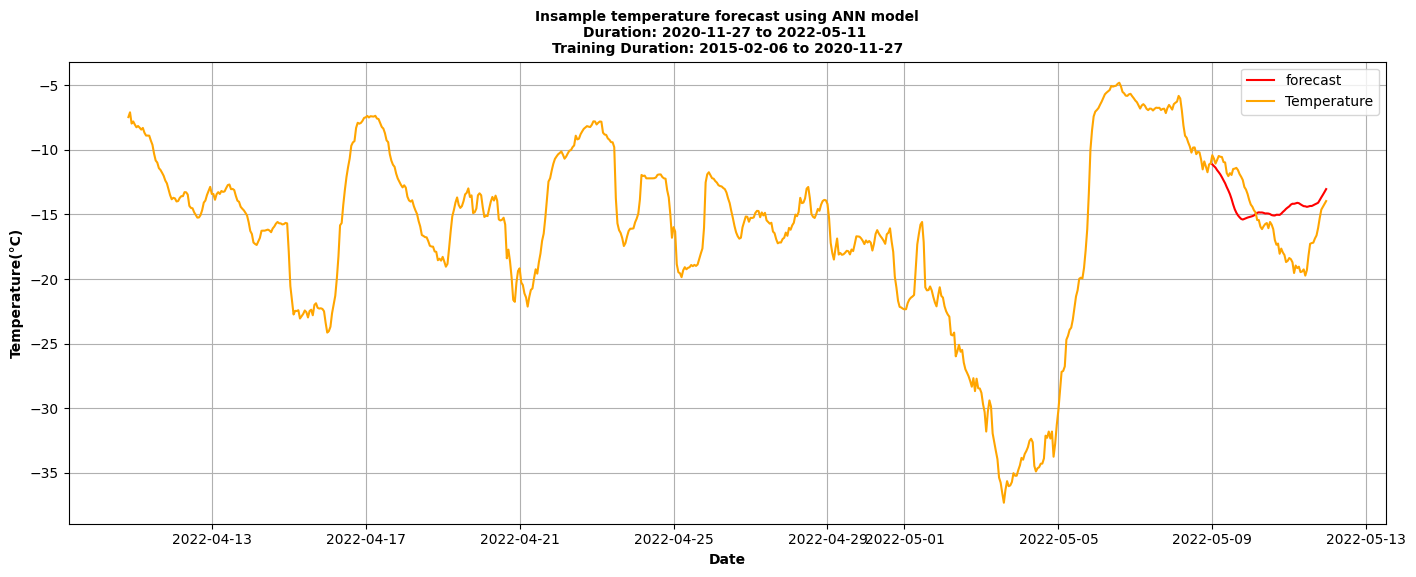

In [95]:
plt.figure(figsize=(17, 6))
plt.plot(weather_data['date'][-(72):],weather_data['forecast'][-(72): ],label = 'forecast', color = 'red')
plt.plot(weather_data['date'][62900: ],weather_data['temp'][62900:],label = 'Temperature',color = 'orange')
plt.xlabel('Date', fontweight='bold')
plt.ylabel('Temperature(°C)',fontweight='bold')
plt.legend()
plt.title('Insample temperature forecast using ANN model\nDuration: 2020-11-27 to 2022-05-11 \nTraining Duration: 2015-02-06 to 2020-11-27', fontsize=10, fontweight='bold')
plt.grid(True)
plt.savefig("Insample temperature forecast using ANN model")


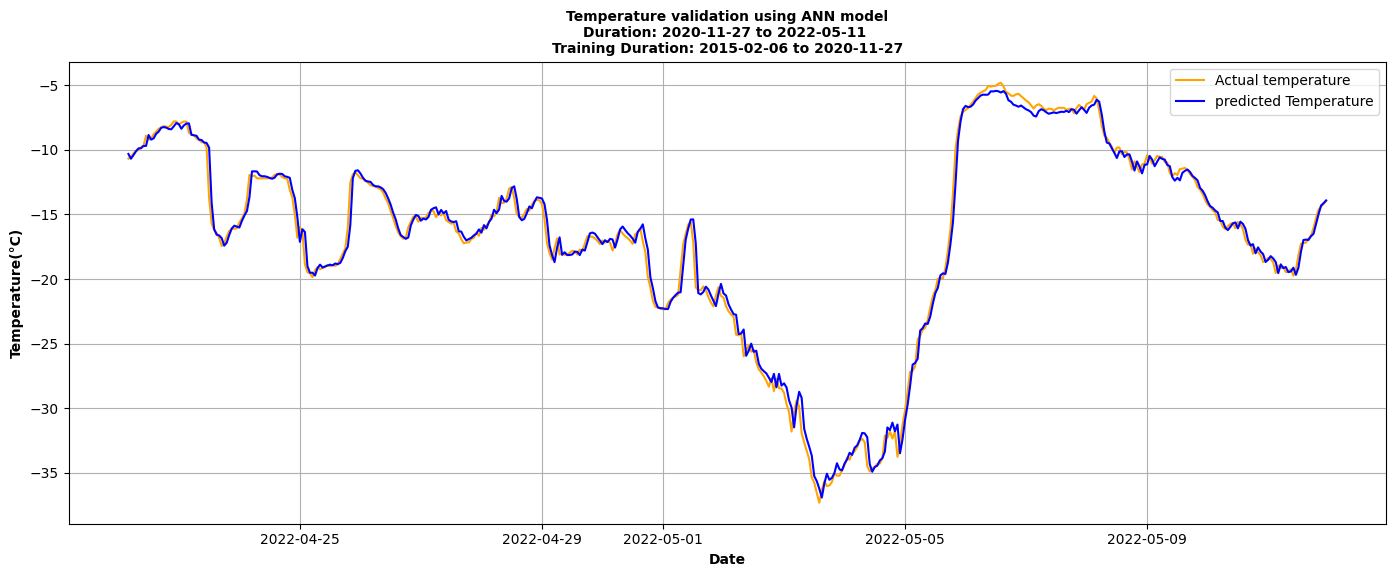

In [96]:
plt.figure(figsize=(17, 6))
plt.plot(weather_data['date'][63172: ],weather_data['temp'][63172: ],label = 'Actual temperature', color = 'orange')
plt.plot(weather_data['date'][63172: ],weather_data['predict'][63172: ], label = 'predicted Temperature', color = 'blue')
plt.xlabel('Date', fontweight='bold')
plt.ylabel('Temperature(°C)',fontweight='bold')
plt.legend()
plt.title('Temperature validation using ANN model\nDuration: 2020-11-27 to 2022-05-11 \nTraining Duration: 2015-02-06 to 2020-11-27', fontsize=10, fontweight='bold')
plt.grid(True)
plt.savefig("Temperature validation using ANN model")

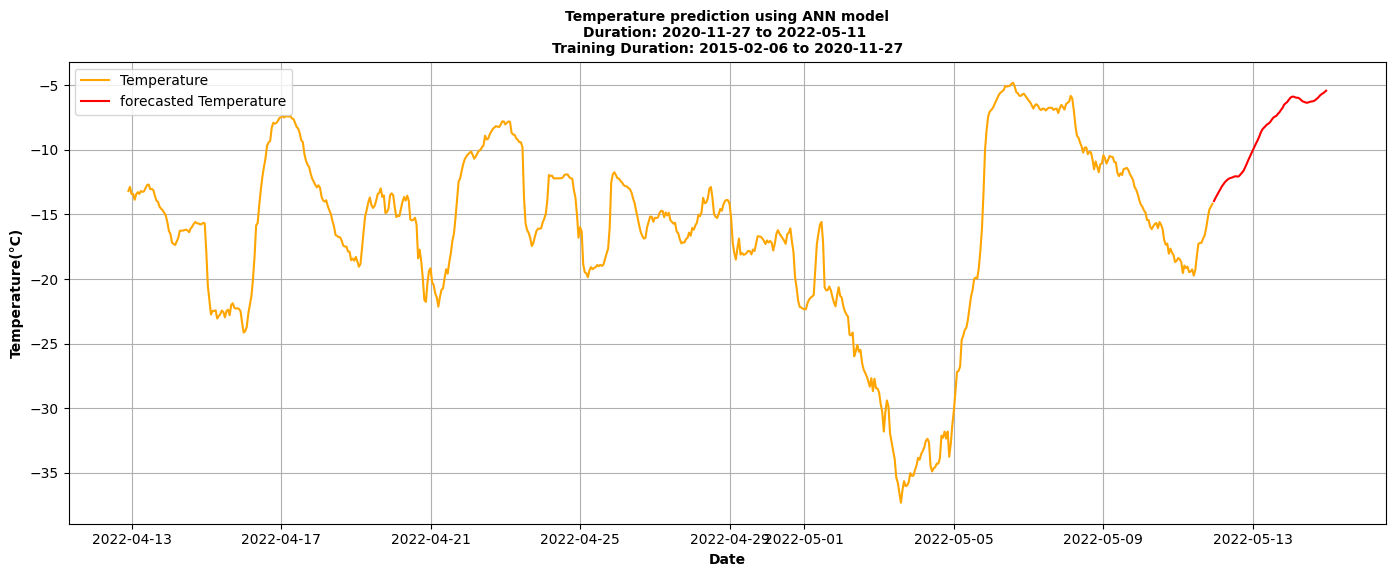

In [97]:
plt.figure(figsize=(17, 6))

plt.plot(df['date'][62950:63647],df['temperatures'][62950:63647],label = 'Temperature', color = 'orange')
plt.plot(df['date'][63647:],df['future'][63647:], label = 'forecasted Temperature', color = 'red')
plt.xlabel('Date', fontweight='bold')
plt.ylabel('Temperature(°C)',fontweight='bold')
plt.legend()
plt.title('Temperature prediction using ANN model\nDuration: 2020-11-27 to 2022-05-11 \nTraining Duration: 2015-02-06 to 2020-11-27', fontsize=10, fontweight='bold')
plt.grid(True)
plt.savefig("Temperature prediction using ANN model")

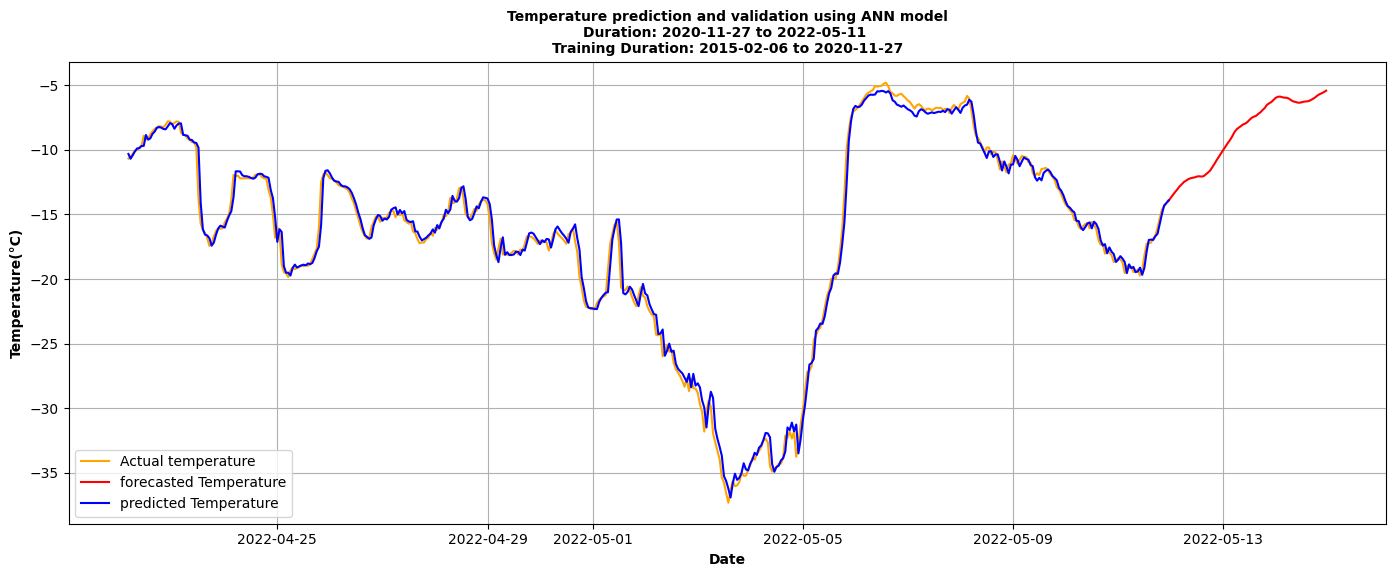

In [98]:
plt.figure(figsize=(17, 6))

plt.plot(df['date'][63172:63647],df['temperatures'][63172:63647],label = 'Actual temperature',color = 'orange')
plt.plot(df['date'][63647: ],df['future'][63647:], label = 'forecasted Temperature', color = 'red')
plt.plot(weather_data['date'][63172: ],weather_data['predict'][63172: ], label = 'predicted Temperature', color = 'blue')
plt.xlabel('Date', fontweight='bold')
plt.ylabel('Temperature(°C)',fontweight='bold')
plt.legend()
plt.title('Temperature prediction and validation using ANN model\nDuration: 2020-11-27 to 2022-05-11 \nTraining Duration: 2015-02-06 to 2020-11-27', fontsize=10, fontweight='bold')
plt.grid(True)
plt.savefig("Temperature prediction using ANN model_final")